In [57]:
import numpy as np
ls = 2**11
data = np.fromfile('soliton.bin')
lt = np.shape(data)[0]//(3*ls)
data = data.reshape(ls*lt, 3)
radius = np.zeros((ls))
time = np.zeros((lt))
field = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    radius[i] = data[i,1]
    
for i in range ((lt)):
    for j in range ((ls)):
        field[i,j] = data[ls*i+j,2]        

In [58]:
print(data)

[[ 4.00000000e-01  7.66990432e-02 -3.51007078e-03]
 [ 4.00000000e-01  2.30097220e-01  4.46173970e-03]
 [ 4.00000000e-01  3.83495667e-01 -4.40869084e-03]
 ...
 [ 8.00000000e-01  1.04303656e+05  2.63960909e-11]
 [ 8.00000000e-01  1.73839562e+05 -9.50294552e-12]
 [ 8.00000000e-01  5.21518892e+05  1.05590389e-12]]


In [59]:
print(time)

[0.4 0.8]


(0.0, 60.0)

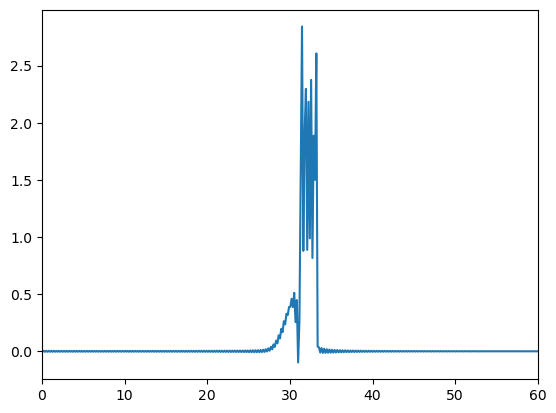

In [60]:
import matplotlib.pyplot as pl
pl.plot(radius[:], field[0,:])
pl.xlim(0,60.0)

IndexError: index 2 is out of bounds for axis 0 with size 2

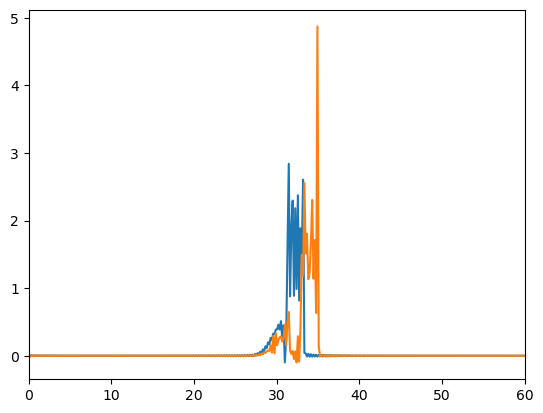

In [61]:
for i in range (150):
    pl.plot(radius[:], field[i,:])
    pl.xlim(0,60.0)

In [10]:
ls = 2**11
data = np.fromfile('approx_breather_v2.bin')

print(np.shape(data))

lt = np.shape(data)[0]//(4*ls)
data = data.reshape(ls*lt, 4)
radius = np.zeros((ls))
time = np.zeros((lt))
field_sg = np.zeros((lt,ls))
for i in range ((lt)):
    time[i] = data[ls*i,0]
    
for i in range ((ls)):
    radius[i] = data[i,1]
    
print(data)
    
for i in range ((lt)):
    for j in range ((ls)):
        field_sg[i,j] = data[ls*i+j,2]

(32817152,)
[[ 4.00000000e-01  7.66990432e-02  1.70145778e+00  5.85121047e-05]
 [ 4.00000000e-01  2.30097220e-01  1.69475806e+00  5.81699379e-05]
 [ 4.00000000e-01  3.83495667e-01  1.68147686e+00  5.74931772e-05]
 ...
 [ 1.60240000e+03  1.04303656e+05 -0.00000000e+00  7.84466660e-12]
 [ 1.60240000e+03  1.73839562e+05 -0.00000000e+00 -4.65161384e-12]
 [ 1.60240000e+03  5.21518892e+05 -0.00000000e+00  1.54443838e-12]]


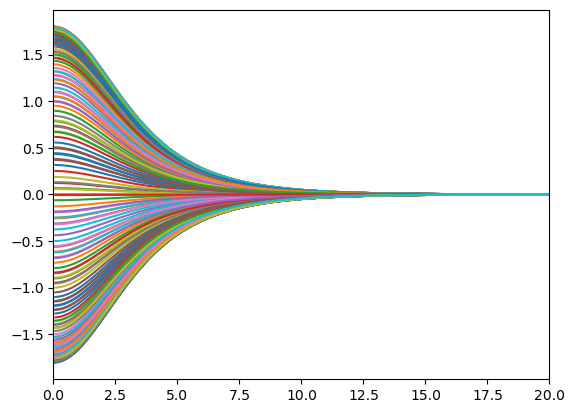

In [11]:
for i in range (150):
    pl.plot(radius[:], field_sg[i,:])
    pl.xlim(0,20.0)

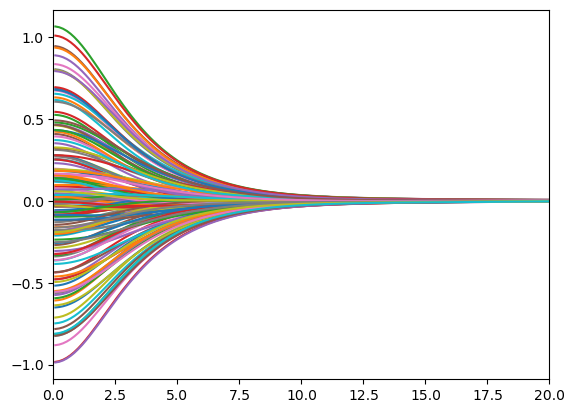

In [12]:
for i in range (150):
    pl.plot(radius[:], field_sg[i,:]-field[i,:])
    pl.xlim(0,20.0)

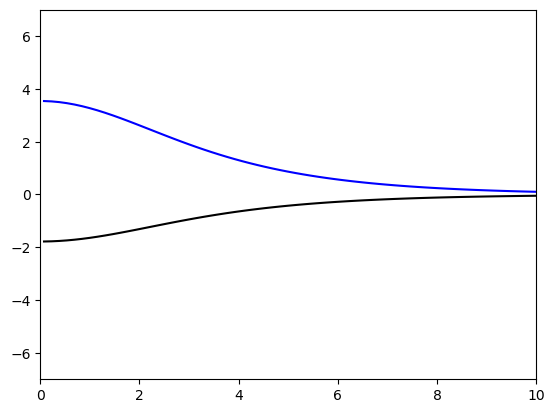

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig, ax = plt.subplots()
xdata, ydata = [], []
xdata2,ydata2= [], []
ln, = plt.plot([], [], '-k') 
ln2, = plt.plot([], [], '-b')

def init():
    ax.set_xlim(0, 10)
    ax.set_ylim(-7, 7)
    ln.set_data([], [])
    ln2.set_data([], [])
    return ln,ln2

def animate(i):
    sol = field_sg[i,:]
    ln.set_data(radius[:], sol)
    
    pert_sol = field[i,:] - field_sg[i,:]
    ln2.set_data(radius[:], pert_sol)
    return ln,ln2

anim = FuncAnimation(fig, animate, init_func=init, frames=len(time), blit=True)
anim.save('exact_sinegordon.mp4', writer='ffmpeg', fps=100)